<a href="https://colab.research.google.com/github/triveni0316/Projects/blob/main/Trading_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Function to fetch stock data
def fetch_stock_data(ticker, start_date, end_date):
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)
    return df

In [ ]:
# Function to calculate moving average
def calculate_moving_average(data, window):
    data[f'MA_{window}'] = data['Close'].rolling(window=window).mean()
    return data


In [ ]:
# Function to calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

In [ ]:
# Function to screen stocks based on criteria
def screen_stocks(data, pe_threshold=20, dividend_yield_threshold=2):
    # Placeholder for actual PE and Dividend Yield values, as yfinance does not provide them
    data['PE'] = 15  # Dummy value
    data['DividendYield'] = 3  # Dummy value
    screened_stocks = data[(data['PE'] < pe_threshold) & (data['DividendYield'] > dividend_yield_threshold)]
    return screened_stocks

In [ ]:
# Function to plot stock data
def plot_data(data, ticker):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data[f'MA_50'], label='50-Day Moving Average')
    plt.title(f'Stock Price of {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

Enter stock ticker: AAPL
Enter start date (YYYY-MM-DD): 2024-08-20
Enter end date (YYYY-MM-DD): 2024-09-21


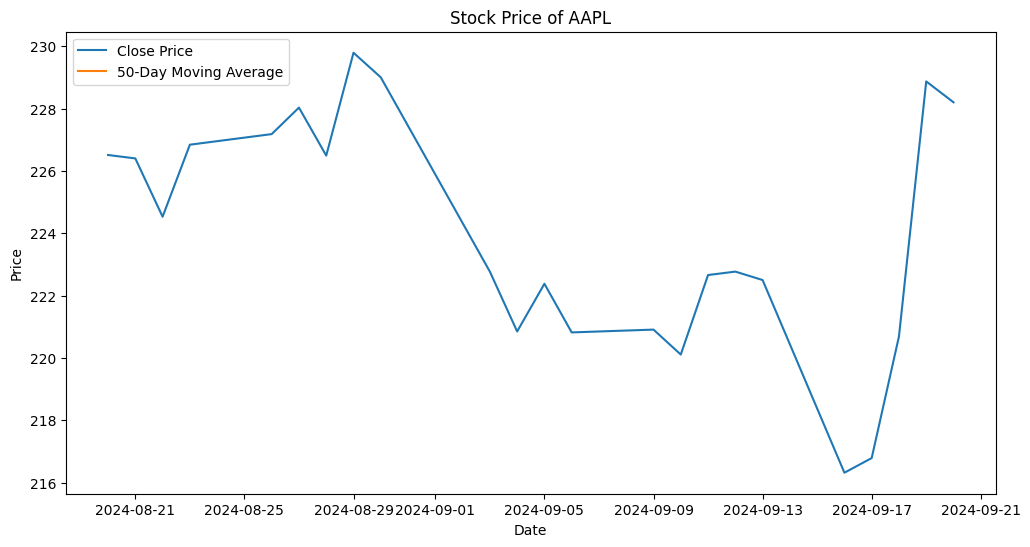

Screened Stocks based on PE < 20 and Dividend Yield > 2%:
                                 Open        High         Low       Close  \
Date                                                                        
2024-08-20 00:00:00-04:00  225.770004  227.169998  225.449997  226.509995   
2024-08-21 00:00:00-04:00  226.520004  227.979996  225.050003  226.399994   
2024-08-22 00:00:00-04:00  227.789993  228.339996  223.899994  224.529999   
2024-08-23 00:00:00-04:00  225.660004  228.220001  224.330002  226.839996   
2024-08-26 00:00:00-04:00  226.759995  227.279999  223.889999  227.179993   
2024-08-27 00:00:00-04:00  226.000000  228.850006  224.889999  228.029999   
2024-08-28 00:00:00-04:00  227.919998  229.860001  225.679993  226.490005   
2024-08-29 00:00:00-04:00  230.100006  232.919998  228.880005  229.789993   
2024-08-30 00:00:00-04:00  230.190002  230.399994  227.479996  229.000000   
2024-09-03 00:00:00-04:00  228.550003  229.000000  221.169998  222.770004   
2024-09-04 00:00:0

In [ ]:
# Main function for the CLI application
def main():
    ticker = input("Enter stock ticker: ")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")

    data = fetch_stock_data(ticker, start_date, end_date)
    data = calculate_moving_average(data, 50)
    data = calculate_rsi(data)

    plot_data(data, ticker)
    screened_data = screen_stocks(data)
    print("Screened Stocks based on PE < 20 and Dividend Yield > 2%:")
    print(screened_data)

if __name__ == "__main__":
    main()